In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from nerfstudio.engine.trainer import Trainer
from nerfstudio.utils.eval_utils import eval_setup

In [21]:
os.chdir('/workspace')
MODEL_PATH = "/workspace/outputs/jackal_four_spins_noise/plane-nerf/2024-01-08_142518"

In [22]:
config_path = os.path.join(MODEL_PATH, "config.yml")

config = yaml.load(Path(config_path).read_text(), Loader=yaml.Loader)

config, pipeline, checkpoint_path, _ = eval_setup(
                        Path(config_path),
                        test_mode="inference",
                    )

WARNING: Using slower TCNN CutlassMLP instead of TCNN FullyFusedMLP

Use layer width of 16, 32, 64, or 128 to use the faster TCNN FullyFusedMLP.

WARNING: Using slower TCNN CutlassMLP instead of TCNN FullyFusedMLP

Use layer width of 16, 32, 64, or 128 to use the faster TCNN FullyFusedMLP.

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/jackal_four_spins_noise/plane-nerf/2024-01-08_142518/nerfstudio_models/step-000009999.ckpt

In [23]:
#Camera object: generate_ray command to create
#RayBundle object

pipeline.eval()
pipeline.datamanager.setup_eval()

for camera, batch in pipeline.datamanager.fixed_indices_eval_dataloader:
    outputs = pipeline.model.get_outputs_for_camera(camera=camera)    
    break

Setting up evaluation dataset...

Caching all 20 images.

Output()

cuda:0 32768 420 640 268800
dict_keys(['rgb', 'accumulation', 'depth', 'expected_depth', 'prop_depth_0', 'prop_depth_1'])
defaultdict(<class 'list'>, {'rgb': [tensor([[0.3667, 0.3848, 0.3573],
        [0.4179, 0.4385, 0.4190],
        [0.4202, 0.4347, 0.3151],
        ...,
        [0.3147, 0.3208, 0.2825],
        [0.3593, 0.3752, 0.2662],
        [0.3293, 0.3368, 0.3252]], device='cuda:0'), tensor([[0.3998, 0.4033, 0.2608],
        [0.3635, 0.3649, 0.3219],
        [0.3993, 0.4070, 0.2659],
        ...,
        [0.3452, 0.3344, 0.3199],
        [0.4298, 0.4328, 0.3047],
        [0.3406, 0.3300, 0.3249]], device='cuda:0'), tensor([[0.3441, 0.3319, 0.3161],
        [0.3609, 0.3462, 0.3171],
        [0.4034, 0.3848, 0.3089],
        ...,
        [0.5667, 0.4481, 0.1513],
        [0.4881, 0.3820, 0.1174],
        [0.4375, 0.3481, 0.1148]], device='cuda:0'), tensor([[0.4261, 0.3455, 0.1148],
        [0.3848, 0.3349, 0.1234],
        [0.4612, 0.4137, 0.1244],
        ...,
        [0.2465, 0

In [28]:
print(batch['image'].shape)

torch.Size([420, 640, 4])


torch.Size([420, 640, 4])
torch.Size([420, 640, 3])


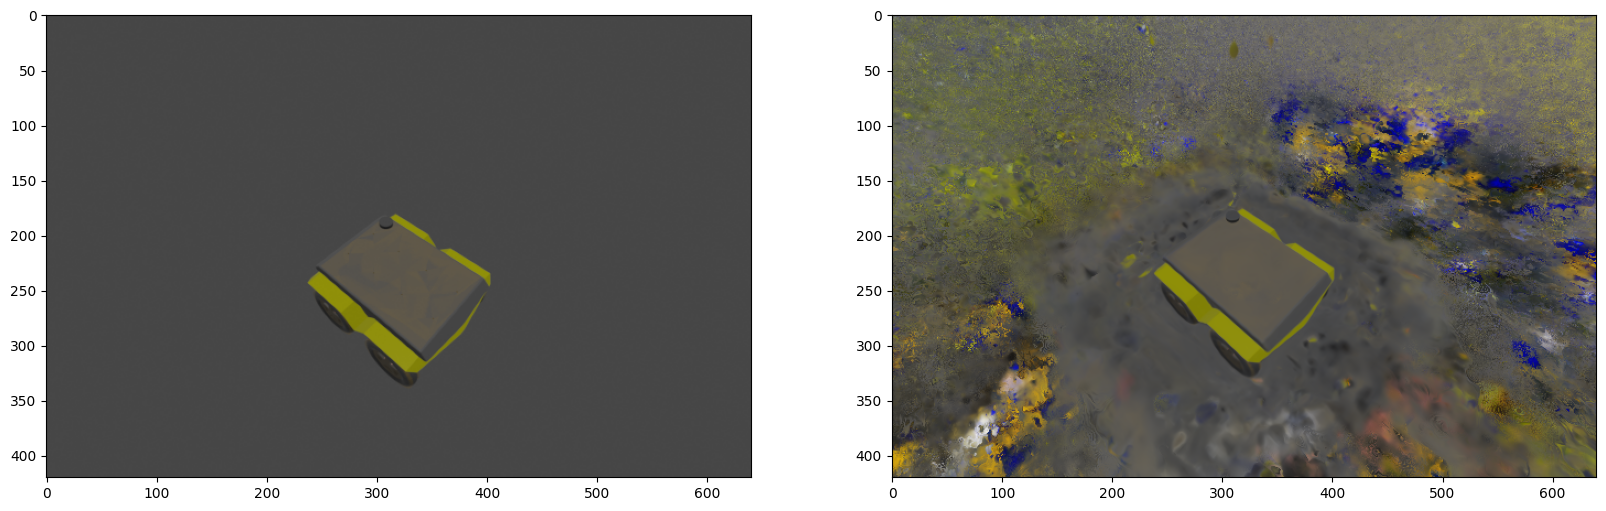

In [24]:
gt_rgb = batch["image"].to(pipeline.model.device)
predicted_rgb = outputs["rgb"]

print(gt_rgb.shape)
print(predicted_rgb.shape)

#Plot gt_rgb and predicted_rgb with matplotlib
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(gt_rgb.cpu().numpy())
plt.subplot(1, 2, 2)
plt.imshow(predicted_rgb.cpu().numpy())
plt.show()


In [25]:
custom_camera = copy.deepcopy(camera)

R_t = np.zeros((1,3,4))
R_t[0,0,0] = 1
R_t[0,1,1] = 1
R_t[0,2,2] = 1
R_t[0,0,3] = 0.2
print(R_t)
custom_camera.camera_to_worlds = torch.from_numpy(R_t).float().to(pipeline.model.device)
print(custom_camera.camera_to_worlds)
print(camera.width,camera.height)
print(camera.cx,camera.cy)

outputs = pipeline.model.get_outputs_for_camera(camera=custom_camera)    

[[[1.  0.  0.  0.2]
  [0.  1.  0.  0. ]
  [0.  0.  1.  0. ]]]
tensor([[[1.0000, 0.0000, 0.0000, 0.2000],
         [0.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000]]], device='cuda:0')
tensor([[640]], device='cuda:0') tensor([[420]], device='cuda:0')
tensor([[320.]], device='cuda:0') tensor([[210.]], device='cuda:0')
cuda:0 32768 420 640 268800
dict_keys(['rgb', 'accumulation', 'depth', 'expected_depth', 'prop_depth_0', 'prop_depth_1'])
defaultdict(<class 'list'>, {'rgb': [tensor([[0.3289, 0.3307, 0.3136],
        [0.3256, 0.3276, 0.3143],
        [0.3261, 0.3285, 0.3164],
        ...,
        [0.3192, 0.3035, 0.2330],
        [0.3339, 0.3173, 0.2376],
        [0.3451, 0.3268, 0.2322]], device='cuda:0'), tensor([[0.3555, 0.3339, 0.2230],
        [0.3610, 0.3368, 0.2193],
        [0.3704, 0.3449, 0.2111],
        ...,
        [0.2968, 0.2932, 0.2829],
        [0.3000, 0.2960, 0.2845],
        [0.3030, 0.2985, 0.2859]], device='cuda:0'), tensor([[0.3065, 0.3015, 

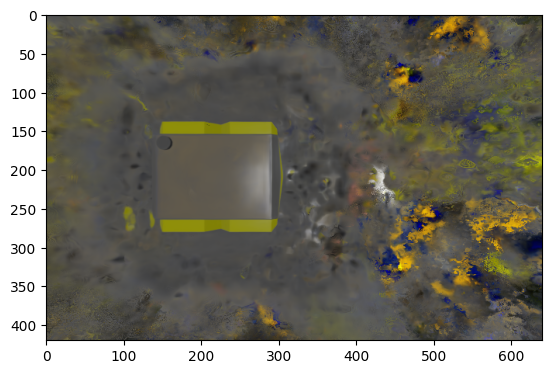

In [26]:
predicted_rgb = outputs["rgb"]
plt.imshow(predicted_rgb.cpu().numpy())
plt.show()
